Dataset folder link: https://drive.google.com/drive/folders/1-QOrDBpVvXWb_zAsaxZnalmvUQRA7yOb?usp=sharing

# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold


# Importing Dataset


In [ ]:
 df_train = pd.read_csv("/content/Training Data.csv")

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df_test = pd.read_csv("/content/Testing Data.csv")

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Making a copy of dataframe

In [ ]:
newdf_train=df_train.copy()
newdf_test=df_test.copy()

# Dropping unwanted columns

In [ ]:
newdf_train=newdf_train.drop(columns=['Loan_ID'])
newdf_test=newdf_test.drop(columns=['Loan_ID'])

In [ ]:
newdf_train=newdf_train.drop(columns=['CoapplicantIncome'])
newdf_test=newdf_test.drop(columns=['CoapplicantIncome'])

# Checking null values




In [ ]:
newdf_train.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
newdf_test.isnull().sum()

Gender              11
Married              0
Dependents          10
Education            0
Self_Employed       23
ApplicantIncome      0
LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
Property_Area        0
dtype: int64

# Data cleaning

In [ ]:
newdf_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
newdf_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [ ]:
newdf_train.Gender.fillna('Male', inplace=True)

In [ ]:
newdf_test.Gender.fillna('Male', inplace=True)

In [ ]:
newdf_train.Gender.isnull().sum()

0

In [ ]:
newdf_train.Gender = newdf_train.Gender.replace(['Male','Female'],[0,1])

In [ ]:
newdf_test.Gender = newdf_test.Gender.replace(['Male','Female'],[0,1])

In [ ]:
newdf_train.Gender

0      0
1      0
2      0
3      0
4      0
      ..
609    1
610    0
611    0
612    0
613    1
Name: Gender, Length: 614, dtype: int64

In [ ]:
newdf_test.Gender

0      0
1      0
2      0
3      0
4      0
      ..
362    0
363    0
364    0
365    0
366    0
Name: Gender, Length: 367, dtype: int64

In [ ]:
newdf_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
newdf_train.Married.fillna('Yes', inplace=True)

In [ ]:
newdf_test.Married.fillna('Yes', inplace=True)

In [ ]:
newdf_train.Married.isnull().sum()

0

In [ ]:
newdf_train.Married=newdf_train.Married.replace(['Yes','No'],[1,0])

In [ ]:
newdf_test.Married=newdf_test.Married.replace(['Yes','No'],[1,0])

In [ ]:
newdf_train.Married

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married, Length: 614, dtype: int64

In [ ]:
newdf_test.Married

0      1
1      1
2      1
3      1
4      0
      ..
362    1
363    1
364    0
365    1
366    0
Name: Married, Length: 367, dtype: int64

In [ ]:
newdf_train['Dependents'].value_counts()


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
newdf_train.Dependents.fillna(0, inplace=True)

In [ ]:
newdf_train.Dependents.isnull().sum()

0

In [ ]:
newdf_train.Dependents=newdf_train.Dependents.replace(['0','1','2','3+'],[0,1,2,3])

In [ ]:
newdf_test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [ ]:
newdf_test.Dependents.fillna(0, inplace=True)

In [ ]:
newdf_test.Dependents=newdf_test.Dependents.replace(['0','1','2','3+'],[0,1,2,3])

In [ ]:
newdf_test.Dependents.dtype

dtype('int64')

In [ ]:
newdf_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
newdf_train.Self_Employed.fillna("No", inplace=True)

In [ ]:
newdf_train.Self_Employed.isnull().sum()

0

In [ ]:
newdf_train.Self_Employed=newdf_train.Self_Employed.replace(['Yes','No'],[1,0])

In [ ]:
newdf_test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [ ]:
newdf_test.Self_Employed.fillna("No", inplace=True)

In [ ]:
newdf_test.Self_Employed=newdf_test.Self_Employed.replace(['Yes','No'],[1,0])

In [ ]:
newdf_train.dtypes

Gender                int64
Married               int64
Dependents            int64
Education            object
Self_Employed         int64
ApplicantIncome       int64
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
dtype: object

In [ ]:
newdf_train.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
newdf_train.Education=newdf_train.Education.replace(['Graduate','Not Graduate'],[1,0])

In [ ]:
newdf_test.Education=newdf_test.Education.replace(['Graduate','Not Graduate'],[1,0])

In [ ]:
newdf_train['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [ ]:
newdf_test['LoanAmount'].value_counts()

150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
71.0      1
157.0     1
93.0      1
61.0      1
98.0      1
Name: LoanAmount, Length: 144, dtype: int64

In [ ]:
newdf_train.LoanAmount.unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [ ]:
newdf_train.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [ ]:
newdf_test.LoanAmount.describe()

count    362.000000
mean     136.132597
std       61.366652
min       28.000000
25%      100.250000
50%      125.000000
75%      158.000000
max      550.000000
Name: LoanAmount, dtype: float64

In [ ]:
newdf_train.LoanAmount.mean()

146.41216216216216

In [ ]:
newdf_test.LoanAmount.mean()

136.13259668508286

In [ ]:
newdf_train.LoanAmount.fillna(newdf_train.LoanAmount.mean(),inplace= True)

In [ ]:
newdf_test.LoanAmount.fillna(newdf_test.LoanAmount.mean(),inplace= True)

In [ ]:
newdf_train.LoanAmount=newdf_train.LoanAmount.astype('int')

In [ ]:
newdf_test.LoanAmount=newdf_test.LoanAmount.astype('int')

In [ ]:
newdf_train.LoanAmount

0      146
1      128
2       66
3      120
4      141
      ... 
609     71
610     40
611    253
612    187
613    133
Name: LoanAmount, Length: 614, dtype: int64

In [ ]:
newdf_train.LoanAmount.isnull().sum()

0

In [ ]:
newdf_test.LoanAmount.isnull().sum()

0

In [ ]:
newdf_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
newdf_test['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
newdf_train.Loan_Amount_Term.dtype

dtype('float64')

In [ ]:
newdf_train.Loan_Amount_Term.describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [ ]:
newdf_train.Loan_Amount_Term.fillna(360.0,inplace= True)

In [ ]:
newdf_test.Loan_Amount_Term.fillna(360.0,inplace= True)

In [ ]:
newdf_train.Loan_Amount_Term=newdf_train.Loan_Amount_Term.astype('int')

In [ ]:
newdf_test.Loan_Amount_Term=newdf_test.Loan_Amount_Term.astype('int')

In [ ]:
newdf_train.Loan_Amount_Term.dtype

dtype('int64')

In [ ]:
newdf_test.Loan_Amount_Term.dtype

dtype('int64')

In [ ]:
newdf_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
newdf_test['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [ ]:
newdf_train.Credit_History.fillna(1.0,inplace= True)

In [ ]:
newdf_test.Credit_History.fillna(1.0,inplace= True)

In [ ]:
newdf_test.Credit_History=newdf_test.Credit_History.astype('int')

In [ ]:
newdf_test.Credit_History.unique()

array([1, 0])

In [ ]:
newdf_train.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

In [ ]:
newdf_test.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
dtype: int64

In [ ]:
newdf_train.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
newdf_test.Property_Area.value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [ ]:
newdf_train.Property_Area=newdf_train.Property_Area.replace(['Semiurban','Urban','Rural'],[2,1,0])

In [ ]:
newdf_test.Property_Area=newdf_test.Property_Area.replace(['Semiurban','Urban','Rural'],[2,1,0])

In [ ]:
newdf_train.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [ ]:
newdf_train.Loan_Status=newdf_train.Loan_Status.replace(['Y','N'],[1,0])

In [ ]:
newdf_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,146,360,1.0,1,1
1,0,1,1,1,0,4583,128,360,1.0,0,0
2,0,1,0,1,1,3000,66,360,1.0,1,1
3,0,1,0,0,0,2583,120,360,1.0,1,1
4,0,0,0,1,0,6000,141,360,1.0,1,1


Test dataset cleaning


In [ ]:
newdf_test.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
dtype: int64

In [ ]:
newdf_test['Gender'].value_counts()

0    297
1     70
Name: Gender, dtype: int64

In [ ]:
newdf_test.Gender.fillna('Male', inplace=True)

In [ ]:
newdf_test.Gender.isnull().sum()

0

In [ ]:
newdf_train.dtypes

Gender                int64
Married               int64
Dependents            int64
Education             int64
Self_Employed         int64
ApplicantIncome       int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History      float64
Property_Area         int64
Loan_Status           int64
dtype: object

In [ ]:
newdf_test.dtypes

Gender              int64
Married             int64
Dependents          int64
Education           int64
Self_Employed       int64
ApplicantIncome     int64
LoanAmount          int64
Loan_Amount_Term    int64
Credit_History      int64
Property_Area       int64
dtype: object

In [ ]:
newdf_train.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.744300,0.781759,0.133550,5403.459283,146.397394,342.410423,0.855049,1.087948,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,84.037503,64.428629,0.352339,0.815081,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,700.000000,480.000000,1.000000,2.000000,1.000000


# Data visualization

In [ ]:
newdf_train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.172914,0.045364,0.000525,-0.058809,-0.107909,0.074030,-0.009170,0.109521,-0.017987
Married,-0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.147131,-0.100912,0.010938,0.007281,0.091478
Dependents,-0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.163108,-0.103864,-0.040160,0.001601,0.010118
Education,0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.167041,0.073928,0.073658,0.066740,0.085884
Self_Employed,0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,0.115259,-0.033739,-0.001550,-0.007124,-0.003700
ApplicantIncome,-0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,0.565621,-0.046531,-0.018615,-0.017321,-0.004710
LoanAmount,-0.107909,0.147131,0.163108,0.167041,0.115259,0.565621,1.000000,0.036486,-0.001412,-0.028995,-0.036345
Loan_Amount_Term,0.074030,-0.100912,-0.103864,0.073928,-0.033739,-0.046531,0.036486,1.000000,-0.004705,0.016086,-0.022549
Credit_History,-0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,-0.001412,-0.004705,1.000000,0.033102,0.540556
Property_Area,0.109521,0.007281,0.001601,0.066740,-0.007124,-0.017321,-0.028995,0.016086,0.033102,1.000000,0.137545


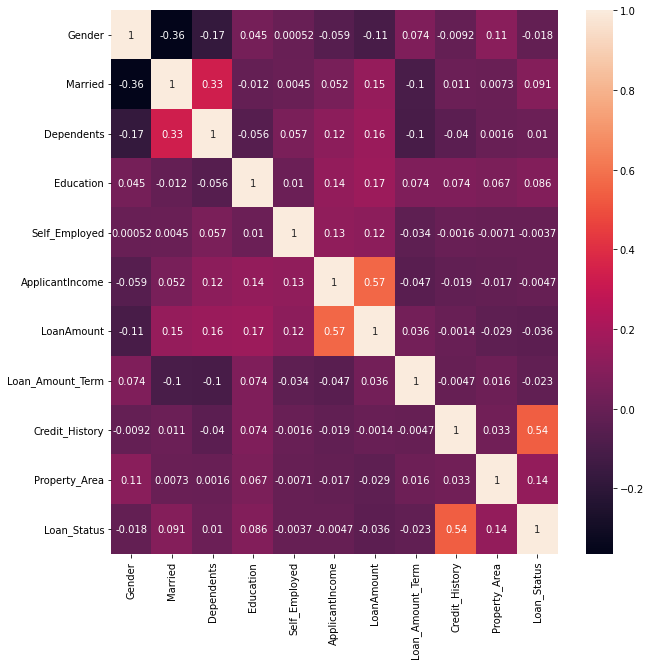

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(newdf_train.corr(), annot=True)

# Data Modelling

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
X = newdf_train.drop('Loan_Status', axis=1)
y = newdf_train.Loan_Status

In [ ]:
model = ExtraTreesClassifier()

In [ ]:
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
model.feature_importances_

array([0.02215892, 0.02343476, 0.06250926, 0.01914436, 0.02405014,
       0.23775686, 0.2325454 , 0.05031704, 0.2809069 , 0.04717636])

In [ ]:
important_feature = pd.Series(model.feature_importances_, index = X.columns)

In [ ]:
important_feature

Gender              0.022159
Married             0.023435
Dependents          0.062509
Education           0.019144
Self_Employed       0.024050
ApplicantIncome     0.237757
LoanAmount          0.232545
Loan_Amount_Term    0.050317
Credit_History      0.280907
Property_Area       0.047176
dtype: float64

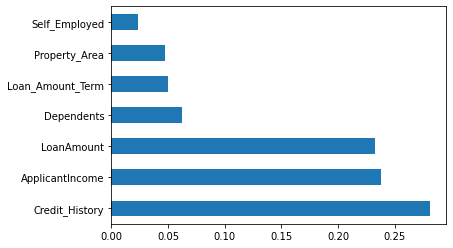

In [ ]:
important_feature.nlargest(7).plot(kind='barh')

In [ ]:
important_feature.nlargest(7)

Credit_History      0.280907
ApplicantIncome     0.237757
LoanAmount          0.232545
Dependents          0.062509
Loan_Amount_Term    0.050317
Property_Area       0.047176
Self_Employed       0.024050
dtype: float64

In [ ]:
new_X = newdf_train[list(important_feature.nlargest(7).index)]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.20, random_state=42)

In [ ]:
len(X_train)

491

In [ ]:
len(X_test)

123

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Kmodel = KNeighborsClassifier(n_neighbors=11)
Lmodel = LogisticRegression()

In [ ]:
Kmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
Lmodel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_K = Kmodel.predict(X_test)

In [ ]:
y_pred_L = Lmodel.predict(X_test)

In [ ]:
newdf = pd.DataFrame({"A": y_test, "P":y_pred_K})

In [ ]:
newdf

,A,P
350,1,1
377,1,1
163,1,1
609,1,1
132,1,1
...,...,...
231,1,1
312,1,1
248,1,1
11,1,1


In [ ]:
confusion_matrix(y_test, y_pred_K)

array([[ 1, 42],
       [ 2, 78]])

In [ ]:
confusion_matrix(y_test, y_pred_L)

array([[18, 25],
       [ 1, 79]])

In [ ]:
Accuracy= (80)/(123)

In [ ]:
Accuracy # kNN

0.6504065040650406

In [ ]:
97/123  # LogisticRegression

0.7886178861788617

In [ ]:
# Accuracy = 80%

# Question and Answers


1. What's the ratio of Male to Female?
-> 251:56


In [ ]:
import math
x=502
y=112
print(str(int(round(x/(math.gcd(502,112)),0))) + ":" + str(int(round(y/(math.gcd(502,112)),0))))

251:56


2. How many Males are Married and Non-married?
-> married - 369
-> unmarried - 133

In [ ]:
len(newdf_train.Gender.loc[newdf_train.Married==0 ][newdf_train.Gender==0]) # Unmarried males

133

In [ ]:
len(newdf_train.Gender.loc[newdf_train.Married==1][newdf_train.Gender==0]) #Married males

369

3. How many Females are Married and Non-marriesd?
-> unmarried - 80
-> married - 32

In [ ]:
len(newdf_train.Gender.loc[newdf_train.Married==0 ][newdf_train.Gender==1]) # Unmarried females

80

In [ ]:
len(newdf_train.Gender.loc[newdf_train.Married==1 ][newdf_train.Gender==1]) # married females

32

4. How many males and females are graduated and non-graduated with respect to their marital status?

In [ ]:
len(newdf_train.Gender.loc[newdf_train.Married==0 ][newdf_train.Gender==1][newdf_train.Education==0]) #non graduated unmarried females

14

In [ ]:
len(newdf_train.Gender.loc[newdf_train.Married==1 ][newdf_train.Gender==1][newdf_train.Education==0]) #non graduated married females

6

In [ ]:
len(newdf_train.Gender.loc[newdf_train.Married==0 ][newdf_train.Gender==1][newdf_train.Education==1]) # graduated unmarried females

66

In [ ]:
len(newdf_train.Gender.loc[newdf_train.Married==1 ][newdf_train.Gender==1][newdf_train.Education==1]) #graduated married females

26

In [ ]:
len(newdf_train.Gender.loc[newdf_train.Married==0 ][newdf_train.Gender==0][newdf_train.Education==0]) # non graduated unmarried male

31

In [ ]:
len(newdf_train.Gender.loc[newdf_train.Married==1 ][newdf_train.Gender==0][newdf_train.Education==0]) # non graduated married male

83

In [ ]:
len(newdf_train.Gender.loc[newdf_train.Married==0 ][newdf_train.Gender==0][newdf_train.Education==1]) # graduated unmarried male

102

In [ ]:
len(newdf_train.Gender.loc[newdf_train.Married==1 ][newdf_train.Gender==0][newdf_train.Education==1]) # graduated married male

286

5. What type of encoding technique will be required to be performed on Education column?
-> ORDINAL ENCODING

6. Is it a male or a female whose loan amount is highest?
-> Highest loan amount is 700 which is taken by MALE.

In [ ]:
newdf_train.Gender[newdf_train.LoanAmount==(max(newdf_train.LoanAmount))]

171    0
Name: Gender, dtype: int64

7. What all features are you going to consider for the model training and why? Give the appropriate reasons for choosing such features among others?................
Credit_History    
ApplicantIncome    
LoanAmount       
Dependents        
Loan_Amount_Term  
Property_Area       
Self_Employed   

8. Which model are you going to choose and define the reason for going with the same model?
-> LogisticRegression because Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.

9. Have you performed HYPER PARAMETER TUNING?
-> No


11. What is the accuracy of your model?
-> The accuracy is 80%

12. The specification and information about the applicant who has the highest income?


13. In order to improve the accuracy ,what more approaches can be done?
Ans. In order to improve the accuracy we can apply other machine learning models like:
Decision Tree
Random Forest
XGBoost

14. What can you conclude with respect to the data?
-> conclusions
1.Applicants with high incomes should have more chances of loan approval.

2.It seems people with a credit history as 1 are more likely to get their loans approved.

3.The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

4.80% of applicants in the dataset are male.
5.Around 65% of the applicants in the dataset are married.
6.Around 15% of applicants in the dataset are self-employed.
7.Around 85% of applicants have repaid their doubts.

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/MyDrive/LOAN_PREDICTION'

MessageError: ignored